In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

Dataset Explanation: Airline Delays for December 2019 and 2020

year: Year data collected
month: Numeric representation of the month
carrier: Carrier
carrier_name: Carrier Name
airport: Airport code
airport_name: Name of airport
arr_flights: Number of flights arriving at airport
arr_del15: Number of flights more than 15 minutes late
carrier_ct: Number of flights delayed due to air carrier. (e.g. no crew)
weather_ct: Number of flights due to weather
nas_ct: Number of flights delayed due to National Aviation System (e.g. heavy air traffic)
security_ct: Number of flights canceled due to a security breach.
late_aircraft_ct: Number of flights delayed as a result of another flight on the same aircraft delayed
arr_cancelled: Number of cancelled flights
arr_diverted: Number of flights that were diverted
arr_delay: Total time (minutes) of delayed flight
carrier_delay: Total time (minutes) of delay due to air carrier
weather_delay: Total time (minutes) of delay due to inclement weather
nas_delay: Total time (minutes) of delay due to National Aviation System
security_delay: Total time (minutes) of delay as a result of a security issue .
late_aircraft_delay: Total time (minutes) of delay flights as a result of a previous flight on the same airplane being late.

Dataset from: https://www.kaggle.com/datasets/eugeniyosetrov/airline-delays

In [13]:
flights = pd.read_csv('flights.csv')
flights.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.0,...,0.0,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.0,...,0.0,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.0,...,0.0,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.0,...,0.0,3.00,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.0,...,0.0,1.00,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0


In [11]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 3351 non-null   int64  
 1   month                3351 non-null   int64  
 2   carrier              3351 non-null   object 
 3   carrier_name         3351 non-null   object 
 4   airport              3351 non-null   object 
 5   airport_name         3351 non-null   object 
 6   arr_flights          3343 non-null   float64
 7   arr_del15            3343 non-null   float64
 8   carrier_ct           3343 non-null   float64
 9   weather_ct           3343 non-null   float64
 10  nas_ct               3343 non-null   float64
 11  security_ct          3343 non-null   float64
 12  late_aircraft_ct     3343 non-null   float64
 13  arr_cancelled        3343 non-null   float64
 14  arr_diverted         3343 non-null   float64
 15  arr_delay            3343 non-null   f

In [47]:
flights.dtypes

Year                     int64
Month                    int64
carrier                 object
Carrier Name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

In [18]:
# Descriptive statistics on the flight info columns of the dataframe

flights_desc = flights.loc[0: len(flights), 'arr_flights': 'late_aircraft_delay']
flights_desc.describe()

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.00000,3343.000000,3343.000000
mean,298.271014,50.995214,16.065337,1.443144,16.183383,0.137320,17.166069,2.884535,0.575830,3333.868083,1144.763087,177.591385,749.57942,5.400838,1256.533353
std,852.436335,146.484456,41.759516,4.821657,56.423008,0.646479,55.447043,10.126658,2.097884,10284.926623,3371.103512,734.343542,3190.50916,27.161402,4184.451426
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,5.000000,1.490000,0.000000,0.820000,0.000000,0.900000,0.000000,0.000000,230.000000,68.500000,0.000000,21.50000,0.000000,31.000000
50%,83.000000,12.000000,4.750000,0.060000,2.980000,0.000000,3.280000,0.000000,0.000000,746.000000,272.000000,3.000000,106.00000,0.000000,205.000000
75%,194.500000,33.000000,12.255000,1.010000,8.870000,0.000000,10.240000,2.000000,0.000000,2095.500000,830.500000,82.000000,362.00000,0.000000,724.000000
max,19713.000000,2289.000000,697.000000,89.420000,1039.540000,17.310000,819.660000,224.000000,42.000000,160383.000000,55215.000000,14219.000000,82064.00000,553.000000,75179.000000


In [19]:
# Renaming of colums
flights = flights.rename(columns={'year': 'Year', 'month': 'Month', 'carrier_name': 'Carrier Name'})

In [21]:
# Setting new index starting from 1
new_index = pd.RangeIndex(1, len(flights) + 1)
flights.set_index(new_index).head()

,Year,Month,carrier,Carrier Name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
1,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.0,...,0.0,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0
2,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.0,...,0.0,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0
3,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.0,...,0.0,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0
4,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.0,...,0.0,3.00,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0
5,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.0,...,0.0,1.00,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0


In [127]:
# Getting the names of all the unique airlines

flights['Carrier Name'].unique()

array(['Endeavor Air Inc.', 'American Airlines Inc.',
       'Alaska Airlines Inc.', 'JetBlue Airways', 'Delta Air Lines Inc.',
       'Frontier Airlines Inc.', 'Allegiant Air',
       'Hawaiian Airlines Inc.', 'Envoy Air', 'Spirit Air Lines',
       'PSA Airlines Inc.', 'SkyWest Airlines Inc.', 'Republic Airline',
       'United Air Lines Inc.', 'Southwest Airlines Co.',
       'Mesa Airlines Inc.', 'ExpressJet Airlines LLC'], dtype=object)

In [35]:
# Showing the sum of arriving flights and the sum of the total numbers and minutes of different types of delays per year

flights_desc['Year'] = flights['Year']
total_delays_per_year = flights_desc.groupby('Year').sum()
total_delays_per_year

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
Year,,,,,,,,,,,,,,,
2019,625763.0,126945.0,36488.05,3161.16,38651.83,277.29,48366.72,5793.0,1358.0,8584420.0,2684814.0,389344.0,1922148.0,11081.0,3577033.0
2020,371357.0,43532.0,17218.37,1663.27,15449.22,181.77,9019.45,3850.0,567.0,2560701.0,1142129.0,204344.0,583696.0,6974.0,623558.0


In [41]:
# Showing the minimum and maximum numbers of flights with more than 15 min delay per airport
delays_per_airport = flights.groupby('airport_name').arr_del15.agg(['min', 'max'])
delays_per_airport 

,min,max
airport_name,,
"Aberdeen, SD: Aberdeen Regional",7.0,15.0
"Abilene, TX: Abilene Regional",2.0,32.0
"Adak Island, AK: Adak",1.0,8.0
"Aguadilla, PR: Rafael Hernandez",10.0,40.0
"Akron, OH: Akron-Canton Regional",2.0,70.0
...,...,...
"Wilmington, NC: Wilmington International",0.0,33.0
"Worcester, MA: Worcester Regional",8.0,30.0
"Wrangell, AK: Wrangell Airport",11.0,16.0


In [74]:
# Showing that which airline had the most diverted flights in which aiport in 2020

flights_in_2020 = flights[flights['Year'] == 2020]
flights_in_2020.sort_values(['arr_diverted'], ascending=False)

,Year,Month,carrier,Carrier Name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
136,2020,12,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",7959.0,1178.0,279.77,29.74,...,2.95,239.13,53.0,31.0,79138.0,28264.0,4729.0,24532.0,141.0,21472.0
951,2020,12,OO,SkyWest Airlines Inc.,ASE,"Aspen, CO: Aspen Pitkin County Sardy Field",599.0,165.0,65.00,12.00,...,0.00,45.00,24.0,25.0,17283.0,3717.0,2572.0,5160.0,0.0,5834.0
1300,2020,12,WN,Southwest Airlines Co.,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",3890.0,320.0,106.42,1.16,...,0.54,107.78,83.0,11.0,11161.0,3724.0,222.0,3092.0,14.0,4109.0
1307,2020,12,WN,Southwest Airlines Co.,DAL,"Dallas, TX: Dallas Love Field",3325.0,326.0,113.87,3.67,...,1.82,86.92,14.0,10.0,14395.0,4775.0,295.0,5476.0,147.0,3702.0
1169,2020,12,OO,SkyWest Airlines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",1883.0,160.0,109.00,35.00,...,0.00,13.00,16.0,10.0,10028.0,4687.0,4435.0,258.0,0.0,648.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,2020,12,DL,Delta Air Lines Inc.,FAI,"Fairbanks, AK: Fairbanks International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
957,2020,12,OO,SkyWest Airlines Inc.,BDL,"Hartford, CT: Bradley International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1147,2020,12,OO,SkyWest Airlines Inc.,PWM,"Portland, ME: Portland International Jetport",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1264,2020,12,UA,United Air Lines Inc.,PNS,"Pensacola, FL: Pensacola International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# Showing how many flights were cancelled in Seattle in December 2020

seattle_cancelled = flights_in_2020.groupby('airport_name').sum()
seattle_cancelled.reset_index()
seattle_cancelled.loc['Seattle, WA: Seattle/Tacoma International', 'arr_cancelled']

93.0

In [44]:
# Showing the mean number of flights and mean number of flights with more than 15 minutes delay per year

mean_per_year = flights.groupby('Year').agg({'arr_del15': 'mean', 'arr_flights': 'mean'})
mean_per_year

,arr_del15,arr_flights
Year,,
2019,70.096632,345.534511
2020,28.415144,242.400131


In [64]:
# Creating American Airlines subset

american = flights.loc[(flights['Carrier Name'] == 'American Airlines Inc.') & (flights['Year'] == 2019)]

In [171]:
# Showing which airports had the most arriving American Airlines flights in December 2019

american.sort_values(['arr_flights'], ascending=False).head(1)

,Year,Month,carrier,Carrier Name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
2972,2019,12,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",12549.0,2090.0,550.92,46.6,...,3.84,781.29,18.0,21.0,129297.0,44343.0,3697.0,24897.0,135.0,56225.0


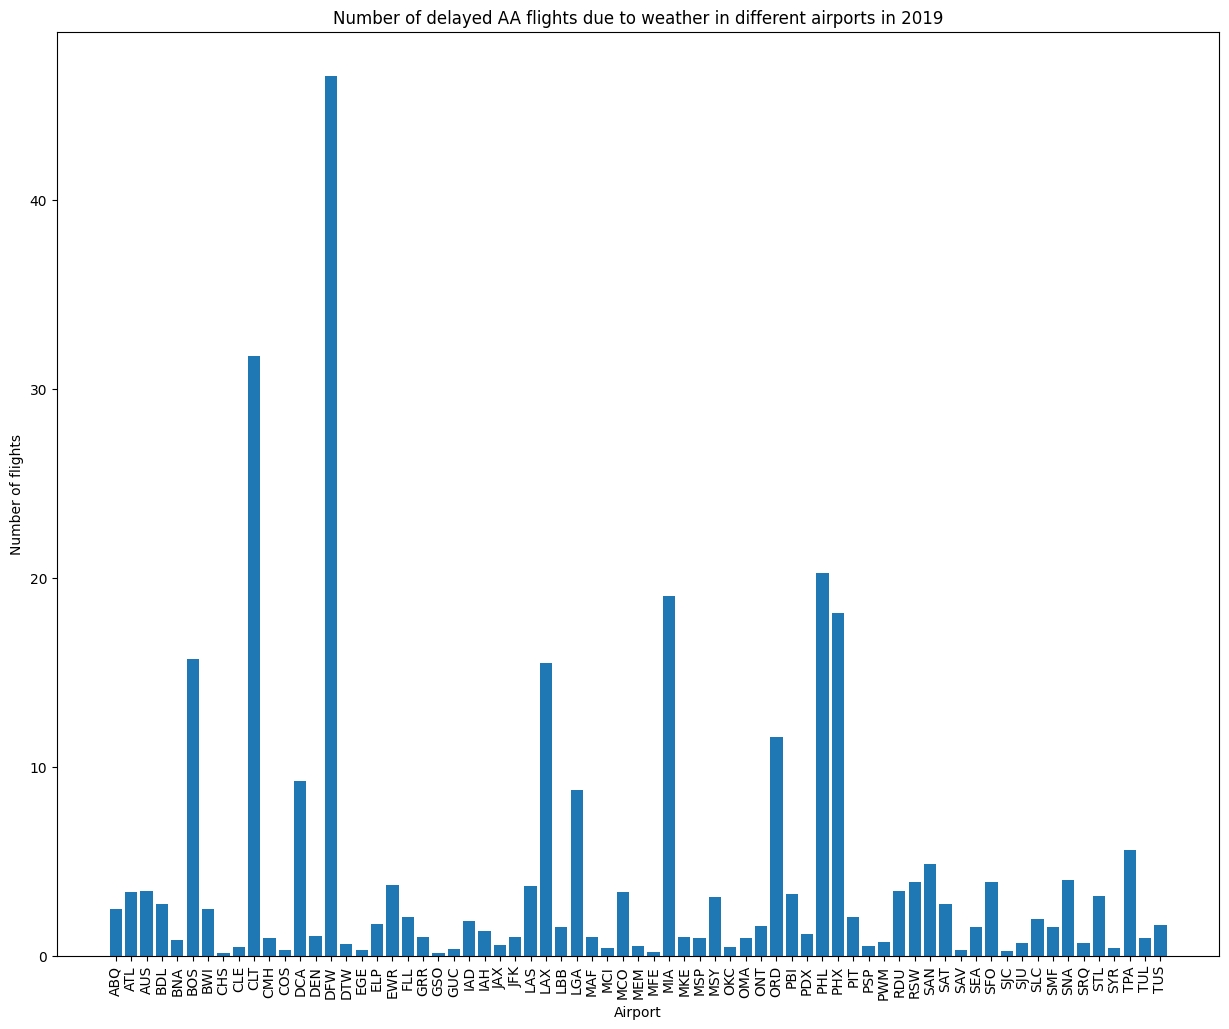

In [104]:
# Bar chart showing the number of delayed American Airlines flights due to weather in different airports in 2019 (excluding airports with 0 delayed flights)

american1 = american[american['weather_ct'] > 0]
plt.figure(figsize=(15,12))
plt.bar(american1['airport'], american1['weather_ct'])
plt.xlabel("Airport")
plt.ylabel("Number of flights")
plt.title("Number of delayed AA flights due to weather in different airports in 2019")
plt.xticks(rotation=90)
plt.show()

In [119]:
# Creating a Delta Airlines subset

delta = flights.loc[(flights['Carrier Name'] == 'Delta Air Lines Inc.')]
delta.head(10)

,Year,Month,carrier,Carrier Name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
334,2020,12,DL,Delta Air Lines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",41.0,4.0,3.37,0.00,...,0.0,0.00,1.0,0.0,850.0,835.0,0.0,15.0,0.0,0.0
335,2020,12,DL,Delta Air Lines Inc.,ALB,"Albany, NY: Albany International",32.0,5.0,2.47,0.00,...,0.0,0.00,0.0,0.0,327.0,146.0,0.0,181.0,0.0,0.0
336,2020,12,DL,Delta Air Lines Inc.,ANC,"Anchorage, AK: Ted Stevens Anchorage Internati...",158.0,31.0,8.07,0.88,...,0.0,4.75,2.0,0.0,1234.0,282.0,55.0,638.0,0.0,259.0
337,2020,12,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",12420.0,1286.0,414.32,15.49,...,7.0,199.07,74.0,6.0,72853.0,38827.0,2024.0,20028.0,364.0,11610.0
338,2020,12,DL,Delta Air Lines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",406.0,98.0,29.20,0.38,...,0.0,6.86,1.0,1.0,5917.0,3385.0,45.0,2102.0,0.0,385.0
339,2020,12,DL,Delta Air Lines Inc.,BDL,"Hartford, CT: Bradley International",111.0,21.0,8.22,1.00,...,0.0,0.61,0.0,0.0,1371.0,443.0,631.0,278.0,0.0,19.0
340,2020,12,DL,Delta Air Lines Inc.,BHM,"Birmingham, AL: Birmingham-Shuttlesworth Inter...",78.0,7.0,5.29,0.00,...,0.0,0.00,0.0,0.0,243.0,197.0,0.0,46.0,0.0,0.0
341,2020,12,DL,Delta Air Lines Inc.,BIL,"Billings, MT: Billings Logan International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342,2020,12,DL,Delta Air Lines Inc.,BNA,"Nashville, TN: Nashville International",408.0,58.0,19.57,0.67,...,0.0,5.60,7.0,0.0,2407.0,972.0,40.0,1013.0,0.0,382.0
343,2020,12,DL,Delta Air Lines Inc.,BOI,"Boise, ID: Boise Air Terminal",127.0,14.0,7.46,0.40,...,0.0,0.79,2.0,1.0,688.0,438.0,28.0,207.0,0.0,15.0


In [122]:
# Aggregating delta dataframe based on the airport name

delta_mean = delta.groupby('airport_name').agg({'arr_flights': 'mean', 'arr_del15': 'mean'})

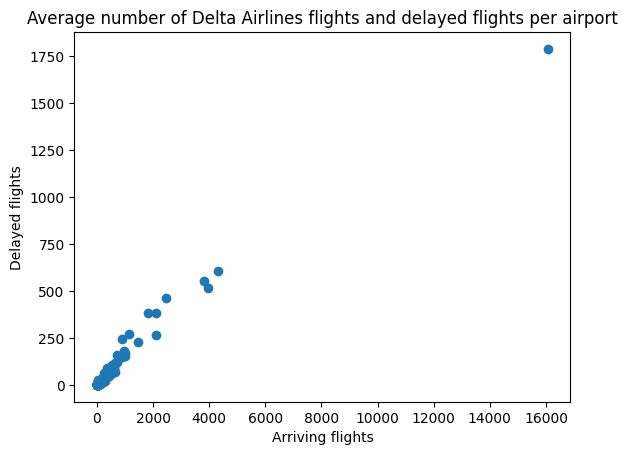

In [125]:
# Creating a scatter plot showing the average number of Delta Airlines flights and delayed flights per airport (based on the average of 2019 and 2020)

plt.scatter(delta_mean['arr_flights'], delta_mean['arr_del15'])
plt.xlabel("Arriving flights")
plt.ylabel("Delayed flights")
plt.title("Average number of Delta Airlines flights and delayed flights per airport")
plt.show()

In [124]:
# Getting the name of the outlier airport with the most Delta Airlines flight and flight delays

delta_mean.sort_values('arr_del15', ascending=False)

,arr_flights,arr_del15
airport_name,,
"Atlanta, GA: Hartsfield-Jackson Atlanta International",16066.5,1787.5
"Minneapolis, MN: Minneapolis-St Paul International",4320.0,607.5
"Salt Lake City, UT: Salt Lake City International",3813.0,554.5
"Detroit, MI: Detroit Metro Wayne County",3940.5,514.5
"Los Angeles, CA: Los Angeles International",2450.5,463.5
...,...,...
"Roanoke, VA: Roanoke Blacksburg Regional Woodrum Field",33.0,1.0
"Manchester, NH: Manchester-Boston Regional",1.0,0.0
"Augusta, GA: Augusta Regional at Bush Field",44.0,0.0


In [145]:
# Creating a dataframe with the top 10 airports which had the biggest number of arriving Delta Airlines flights in 2020 (setting the aiport code as index)

delta2020 = delta[delta['Year'] == 2020]
delta2020 = delta2020.set_index('airport')
delta2020_top10 = delta2020.sort_values('arr_flights', ascending=False)
delta2020_top10 = delta2020_top10.iloc[0:10]
delta2020_top10.shape


(10, 20)

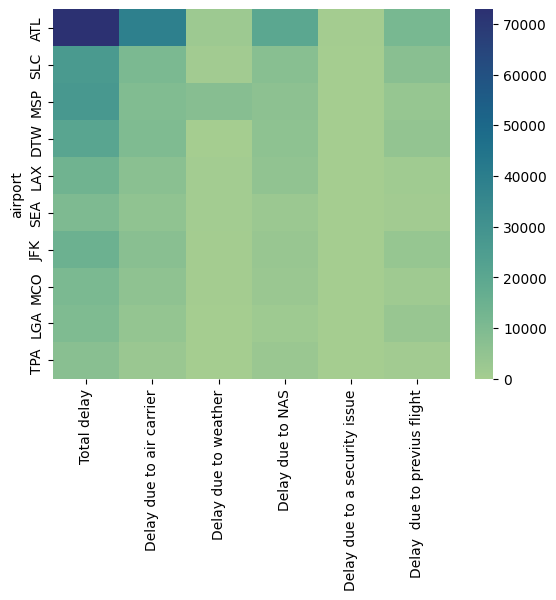

In [152]:
# Getting the minutes of the different types of delays of Delta Airlines flights at the various airports

sns.heatmap(delta2020_top10[['arr_delay','carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']], 
            annot=False, 
            cmap="crest", 
            xticklabels=['Total delay', 
                         'Delay due to air carrier', 
                         'Delay due to weather', 
                         'Delay due to NAS',
                         'Delay due to a security issue',
                         'Delay  due to previus flight']);

In [156]:
# Creating an Allegiant Airlines subplot
allegiant = flights.loc[(flights['Carrier Name'] == 'Allegiant Air')]
allegiant.shape


(240, 21)

In [157]:
allegiant.head()

,Year,Month,carrier,Carrier Name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
533,2020,12,G4,Allegiant Air,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,9.0,1.00,0.72,...,0.0,6.23,0.0,1.0,977.0,187.0,18.0,623.0,0.0,149.0
534,2020,12,G4,Allegiant Air,ABQ,"Albuquerque, NM: Albuquerque International Sun...",12.0,3.0,1.08,0.00,...,0.0,1.91,1.0,0.0,244.0,87.0,0.0,1.0,0.0,156.0
535,2020,12,G4,Allegiant Air,ALB,"Albany, NY: Albany International",18.0,3.0,1.76,0.00,...,0.0,0.00,0.0,0.0,352.0,308.0,0.0,44.0,0.0,0.0
536,2020,12,G4,Allegiant Air,ATW,"Appleton, WI: Appleton International",61.0,5.0,2.73,0.00,...,0.0,1.00,0.0,0.0,234.0,177.0,0.0,27.0,0.0,30.0
537,2020,12,G4,Allegiant Air,AUS,"Austin, TX: Austin - Bergstrom International",39.0,8.0,3.70,0.80,...,0.0,0.79,0.0,0.0,694.0,280.0,43.0,337.0,0.0,34.0


In [166]:
# Creating a subplot where the year is 2019 and setting the airport as index

allegiant2019 = allegiant[allegiant['Year'] == 2019]
allegiant2019 = allegiant2019.set_index('airport')
allegiant2019.head()

,Year,Month,carrier,Carrier Name,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
airport,,,,,,,,,,,,,,,,,,,,
ABE,2019,12,G4,Allegiant Air,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",90.0,15.0,6.23,1.06,1.75,0.0,5.96,1.0,0.0,899.0,534.0,22.0,57.0,0.0,286.0
ABQ,2019,12,G4,Allegiant Air,"Albuquerque, NM: Albuquerque International Sun...",20.0,6.0,2.89,0.00,1.55,0.0,1.56,0.0,0.0,368.0,280.0,0.0,55.0,0.0,33.0
ALB,2019,12,G4,Allegiant Air,"Albany, NY: Albany International",30.0,6.0,2.78,1.00,2.19,0.0,0.03,0.0,0.0,338.0,136.0,78.0,121.0,0.0,3.0
ATW,2019,12,G4,Allegiant Air,"Appleton, WI: Appleton International",48.0,6.0,1.94,2.57,1.49,0.0,0.00,1.0,0.0,1029.0,317.0,685.0,27.0,0.0,0.0
AUS,2019,12,G4,Allegiant Air,"Austin, TX: Austin - Bergstrom International",56.0,15.0,4.75,0.93,3.24,0.0,6.08,0.0,0.0,743.0,238.0,14.0,115.0,0.0,376.0


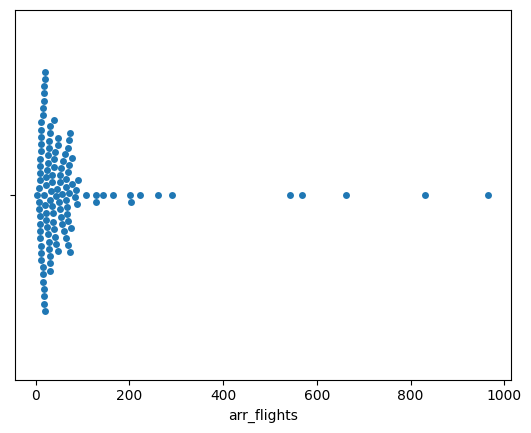

In [179]:
# Showing the number of Allegiant Airlines arriving flights per airport in 2019

sns.swarmplot(data=allegiant2019, x="arr_flights", size=5);

In [172]:
# Getting the airport name with the most Allegiant flights in 2019

allegiant2019.sort_values('arr_flights', ascending=False).head(1)

,Year,Month,carrier,Carrier Name,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
airport,,,,,,,,,,,,,,,,,,,,
SFB,2019,12,G4,Allegiant Air,"Sanford, FL: Orlando Sanford International",966.0,254.0,64.32,15.82,45.76,2.94,125.17,10.0,0.0,21600.0,8285.0,2194.0,1840.0,103.0,9178.0
